In [2]:
#import dataframe_image as dfi
import matplotlib.pyplot as plt
import mlrose_hiive

from mlrose_hiive import  ContinuousPeaksGenerator,FlipFlopGenerator,TSPGenerator
from mlrose_hiive import RHCRunner,SARunner, GARunner,MIMICRunner, NNGSRunner

#import mlrose
import numpy as np
import pandas as pd
import time
import warnings

#from sklearn.metrics import accuracy_score
from sklearn.model_selection import (GridSearchCV, train_test_split, validation_curve)   
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
np.random.seed(42)

In [2]:
#task 1 : Tuning of each algorithm on every problem
#

In [3]:
seeds = [2693, 3627, 9555, 5450, 1663, 9721, 5592, 7392]

In [3]:
# Fitness Functions
#fitness_functions = [('fourpeaks',)
#                      ('continuous_peak'),
#                      ('TSP'),
#                      ('Flip_flop')]
#


#best_params = []




#MIMIC
#max_attempts
#keep_percent_list

#RHC
#max_attempts
#restart_list

#Genetic
#population_size
#mutation_rate

#SA
#Temperature
#max_attempts
#Decay type (geo/exp/etc)


In [3]:
seed_1 = seeds[0]

# Section 0 : generating base problems

In [4]:
generator_dict = {

'ContinuousPeaksGenerator': ContinuousPeaksGenerator,
'FlipFlopGenerator': FlipFlopGenerator,
'TSPGenerator'    : TSPGenerator

}

generator_dict_params = {

'ContinuousPeaksGenerator': dict(seed = seeds[0], size=25, t_pct=0.1),
'FlipFlopGenerator': dict(seed = seeds[0], size=10),
'TSPGenerator'    : dict(seed = seeds[0], number_of_cities=10)

}



random_algorithms = dict(Random_hill_climb = RHCRunner,
                    Simulated_annealing=SARunner,
                    Genetic_Algorithm=GARunner,
                    MIMIC=MIMICRunner)




runner_param_dict = {

'Random_hill_climb': dict(iteration_list=4 ** np.arange(6),
                           #max_attempts=[10,20,100,500, 1000],
                           restart_list=[1,3,10,25,100]),
'Simulated_annealing': dict(iteration_list=4 ** np.arange(6),
                           #max_attempts=1000,
                           temperature_list=[0.1,0.2],
                     decay_list=[mlrose_hiive.GeomDecay]),
'Genetic_Algorithm': dict(iteration_list=2 ** np.arange(12),
                           #max_attempts=1000,
                            population_sizes=[20],
                            mutation_rates=[0.3]),
'MIMIC': dict(iteration_list=2 ** np.arange(12),
                           population_sizes=[200],
                          #max_attempts=1000,
                           keep_percent_list=[0.2],
                           use_fast_mimic=True)}





runner_param_test_dict = {

'Random_hill_climb': dict(iteration_list=4 ** np.arange(6),
                           #max_attempts=np.array([10,20,100,500, 1000]),
                           restart_list=[1,10,25,50,100]),
'Simulated_annealing': dict(iteration_list=4 ** np.arange(6),
                           #max_attempts=1000,
                           temperature_list=[ 0.1       ,  0.21544347,  0.46415888,  1.        ,  2.15443469,
        4.64158883, 10.     ],
                     decay_list=[mlrose_hiive.GeomDecay]),
'Genetic_Algorithm': dict(iteration_list=4 ** np.arange(6),
                           #max_attempts=1000,
                            population_sizes=[10,20,50,100,200],
                            mutation_rates=[0.3]),
'MIMIC': dict(iteration_list=4 ** np.arange(6),
                           population_sizes=[10,20,50,100,200],
                           #max_attempts=1000,
                           keep_percent_list=[ 0.1  , 0.325, 0.55 , 0.775, 1. ],
                           use_fast_mimic=True)}



In [7]:
#help(generator_dict['ContinuousPeaksGenerator'])

# Section 1 : Tuning models

In [5]:
from itertools import product

In [6]:
max_attempts=[10,100,500]

In [7]:
import glob

In [11]:
ls

Documentation_req.docx      base_windows_version.ipynb
README.md                   multiprocessing_func_2.py
__pycache__/                runner_out/
agg_tables/                 ~$cumentation_req.docx
base.ipynb


In [7]:
np.random.seed(seeds[0]) 
            
        
#for i in range(max_attempts=[10,20,100,500, 1000])
def evaluate_params(fit = 'ContinuousPeaksGenerator',
                    experiment_name='rhc_test_',
                    output_directory=r'runner_out/',
                    ro = 'Random_hill_climb',
                   
                   seeds = seeds,
                   max_attempts = max_attempts
                   ,runner_param_test_dict = runner_param_test_dict
                   ):
    model_dict = dict({})
    np.random.seed(seeds[0]) 
    for j,i in enumerate(list(product(seeds,max_attempts))):
        
                                          
                         
        model = random_algorithms[ro](problem=generator_dict[fit].generate(**generator_dict_params[fit]),
                        experiment_name=experiment_name+str(j),
                        output_directory=output_directory+fit,
                        seed=i[0],
                        **runner_param_test_dict[ro],max_attempts=i[-1]) 

        model_run_stats, model_run_curves = model.run()
        model_run_curves['max_attempts'] = i[-1]
        model_run_stats['max_attempts'] = i[-1]
        model_run_curves['seed'] = i[0]
        model_run_stats['seed'] = i[0]

        model_dict[j] ={'seed_se':i,
                      'exp_name':experiment_name+str(j),
                      'output_directory':output_directory+fit,
                     'stats':model_run_stats
                      ,'curve':model_run_curves
                     }
        
    return model_dict
    
    
    
    
    
    
    
    

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
y_pred = nn_model4.predict(test_X)
print(classification_report(pd.get_dummies(test_y.values.ravel()).values, y_pred))
y_pred_train = nn_model4.predict(train_X)
print(classification_report(pd.get_dummies(train_y.values.ravel()).values, y_pred_train))

In [8]:
np.random.seed(seeds[0]) 
            
            

#for i in range(max_attempts=[10,20,100,500, 1000])
def evaluate_problem_size(fit = 'ContinuousPeaksGenerator',
                    experiment_name='rhc_test_',
                    output_directory=r'runner_out/problem_size/',
                    ro = 'Random_hill_climb',
                   
                   seeds = seeds,
                   problem_size = list(range(10,100,10)),
                   best_ro_params =dict()
                   ):
    model_dict = dict({})
    np.random.seed(seeds[1]) 
    
    if ro ==  'Random_hill_climb': 
        params_ro = dict(iteration_list=4 ** np.arange(6),
                           **best_ro_params)
    elif ro == 'Simulated_annealing': 
        params_ro = dict(iteration_list=4 ** np.arange(6),
                               **best_ro_params,
                         decay_list=[mlrose_hiive.GeomDecay]
                        )
    elif ro == 'Genetic_Algorithm': 
        params_ro = dict(iteration_list=4 ** np.arange(6),
                               #max_attempts=1000,
                                **best_ro_params)
    elif ro == 'MIMIC': 
        params_ro = dict(iteration_list=4 ** np.arange(6),
                               **best_ro_params,
                               use_fast_mimic=True)
    
    
    
    
    
    for j,i in enumerate(list(product(seeds,problem_size))):
        
        if  fit ==  'ContinuousPeaksGenerator':                                
            problem = generator_dict[fit].generate(seed = seeds[0], size=i[1], t_pct=0.1)
        elif  fit ==  'FlipFlopGenerator':                                
            problem = generator_dict[fit].generate(seed = seeds[0], size=i[1])        
        elif  fit ==  'TSPGenerator':                                
            problem = generator_dict[fit].generate(seed = seeds[0], number_of_cities = i[1])
            

        
        model = random_algorithms[ro](problem=problem,
                        experiment_name=experiment_name+str(j),
                        output_directory=output_directory+fit,
                        seed=i[0],
                        **params_ro) 

        model_run_stats, model_run_curves = model.run()
        model_run_curves['size'] = i[1]
        model_run_stats['size'] = i[1]
        model_run_curves['seed'] = i[0]
        model_run_stats['seed'] = i[0]

        model_dict[j] ={'seed_se':i,
                      'exp_name':experiment_name+str(j),
                      'output_directory':output_directory+fit,
                     'stats':model_run_stats
                      ,'curve':model_run_curves
                     }
        
    return model_dict
    

    


In [9]:

def get_best_model(model_dict,exp_name='random',output_directory='random',fitness_='random',
                  problem_max = True,save = True,
                  
                  params = ['Restarts','max_attempts'] 
                  ,ro='random'
                  ):
    curve_list = pd.concat([model_dict[i]['curve'] for i in model_dict] )
    #stats_list = pd.concat([model_dict[i]['stats'] for i in model_dict] )

    
    if ro=="Simulated_annealing":
        curve_list['Temperature'] = curve_list.Temperature.apply(lambda x: x.init_temp)
        #stats_list['Temperature'] = stats_list.schedule_init_temp)
    
    

    curve_tab = curve_list.groupby(params+['Iteration','max_iters'])[['Fitness', 'FEvals', 'Time']].mean().reset_index()
    
    curve_tab = curve_tab[curve_tab.Fitness == (curve_tab.Fitness.max()  if problem_max else curve_tab.Fitness.min() ) 
              ].reset_index().sort_values(['FEvals','max_attempts'])
    
    #stats_tab = stats_list#.groupby(params+['Iteration','max_iters'])[['Fitness', 'FEvals', 'Time']].mean().reset_index()
    
    #stats_tab = stats_tab[stats_tab.Fitness == (curve_tab.Fitness.max()  if problem_max else stats_tab.Fitness.min() ) 
    #          ].reset_index().sort_values(['FEvals','max_attempts'])    
    
    
    
    
    
    if save:
        curve_tab.to_csv(r'agg_tables/'+exp_name+'_'+fitness_+'.csv')
        curve_list.to_csv(r'agg_tables/curve_data_'+exp_name+'_'+fitness_+'.csv')
        #stats_tab.to_csv(r'agg_tables/stats_data_'+exp_name+'_'+fitness_+'.csv')
    return curve_tab,curve_list,curve_tab.reset_index().iloc[0]#,stats_tab
    
    

In [10]:
def agg_problem_size_model(model_dict,exp_name='random',output_directory='random',fitness_='random',
                  problem_max = True,save = True,
                          params = ['Restarts','size'],ro='random'
                          ):
    curve_list = pd.concat([model_dict[i]['stats'] for i in model_dict] )
    #stats_list = pd.concat([model_dict[i]['stats'] for i in model_dict] )
      
    if ro=="Simulated_annealing":
        curve_list['Temperature'] = curve_list.Temperature.apply(lambda x: x.init_temp)
    

    curve_tab = curve_list.groupby(params+['Iteration','max_iters'])[['Fitness', 'FEvals', 'Time']].mean().reset_index()
    
    #curve_tab = curve_tab[curve_tab.Fitness == (curve_tab.Fitness.max()  if problem_max else curve_tab.Fitness.min() ) 
    #          ].reset_index().sort_values(['FEvals','max_attempts'])
    
    #stats_tab = stats_list.groupby(params+['Iteration','max_iters'])[['Fitness', 'FEvals', 'Time']].mean().reset_index()
     
    
        
    
    
    
    curve_tab.to_csv(r'agg_tables/problem_size/'+exp_name+'_'+fitness_+'.csv')
    #stats_tab.to_csv(r'agg_tables/problem_size/stats_data_'+exp_name+'_'+fitness_+'.csv')
    #curve_list.to_csv(r'agg_tables/problem_size/curve_data_'+exp_name+'_'+fitness_+'.csv')
    return curve_tab,curve_list,curve_tab.sort_values('Fitness',ascending = False).iloc[0]#,stats_tab
    

In [181]:
#curve_list = pd.concat([rhc_dict[i]['curve'] for i in rhc_dict] )
mlrose_hiive.genetic_alg

index                 0.00000
Restarts              1.00000
Iteration           682.00000
max_iters          1024.00000
max_attempts        500.00000
Time                  0.04677
Fitness              46.00000
FEvals             1376.00000
current_restart       1.00000
Name: 0, dtype: float64

In [12]:
import os

In [11]:
import os

def run_ro_analysis_for_fit(fit = 'ContinuousPeaksGenerator',
                    experiment_name='rhc_test',
                    output_directory=r'runner_out/',
                    ro = 'Random_hill_climb',
                   
                   seeds = seeds,
                   max_attempts = max_attempts,
                           
                   problem_size =  list(range(10,100,10)),
                           
                           
                           
                           ):


    if ro ==  'Random_hill_climb': 
        params_best_finder = ['Restarts','max_attempts'] 
        #params_size_best_finder = ['Restarts','size']
    elif ro == 'Simulated_annealing': 
        params_best_finder = ['Temperature','max_attempts'] 
        #params_size_best_finder = ['Temperature','size']
    elif ro == 'Genetic_Algorithm': 
        params_best_finder = ['Population Size', 'Mutation Rate','max_attempts'] 
        #params_size_best_finder = ['Population Size', 'Mutation Rate','max_attempts'] 
    elif ro == 'MIMIC': 
        params_best_finder = ['Population Size','Keep Percent','max_attempts'] 
            
   

    
    
    model_dict  = evaluate_params(fit = fit,
                        experiment_name=experiment_name+'_',
                        output_directory=output_directory,
                        ro = ro,

                       seeds = seeds,
                       max_attempts = max_attempts

                       )
    
    
    print('model_evaluated')
    
    if fit ==  'ContinuousPeaksGenerator':                                
        problem_max = True
        params_size_best_finder = params_best_finder[:-1]+['size']
    elif  fit ==  'FlipFlopGenerator':                                
        problem_max = True  
        params_size_best_finder = params_best_finder[:-1]+['size']
    elif  fit ==  'TSPGenerator':                                
        problem_max = False
        params_size_best_finder = params_best_finder[:-1]+['size']
            


    rhc_curve_tab,rhc_curve_list,rhc_curve_tab_best = get_best_model(model_dict,exp_name=experiment_name,
                                                                     output_directory='_',fitness_=fit,
                                                                    
                                                                    problem_max = problem_max,
                                                                     params = params_best_finder
                                                                     ,ro=ro
                                                                    )

    print('best_found')
    
    rhc_best_curve_list = rhc_curve_list.copy()
    
    #rhc_best_tab_list = stats_tab.copy()
    
    
    for i in  params_best_finder:
    
        rhc_best_curve_list = rhc_best_curve_list[rhc_best_curve_list[i].isin([rhc_curve_tab_best[i]])]
        
        #rhc_best_tab_list = rhc_best_tab_list[rhc_best_tab_list[i].isin([rhc_curve_tab_best[i]])]
        
    
    #rhc_best_tab_list
    
    outdir = './agg_tables/summary/'+fit
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    

    
    
    
    #fevel_time = rhc_best_curve_list.groupby('Time').FEvals.mean()

    #fitness_time =rhc_best_curve_list.groupby('Time').Fitness.mean()

    #fitness_iter =rhc_best_curve_list.groupby('Iteration').Fitness.mean() #rhc_best_curve_list, x="Iteration", y="Fitness"

    
    fevel_time = rhc_best_curve_list.groupby('FEvals').Time.mean()

    fitness_time =rhc_best_curve_list.groupby('Iteration').Time.mean()#.iloc[runner_param_test_dict['iteration_list']]

    fitness_iter =rhc_best_curve_list.groupby('Iteration').Fitness.mean()#.iloc[runner_param_test_dict['iteration_list']]
  
    
    
    
    #fevel_time = rhc_best_tab_list.groupby('FEvals').Time.mean()

    #fitness_time =rhc_best_tab_list.groupby('Iteration').Time.mean()

    #fitness_iter =rhc_best_curve_list.groupby('Iteration').Fitness.mean() #rhc_best_curve_list, x="Iteration", y="Fitness"

    
    
    
    
    
    
    
    fevel_time.plot()
    plt.ylabel('Time') 
    plt.show()
    fitness_time.plot()
    plt.ylabel('Time') 
    plt.show()
    fitness_iter.plot()
    plt.ylabel('Fitness') 
    plt.show()
    
    
    
    
    fevel_time.to_csv(os.path.join(outdir, experiment_name+'fevel_time_.csv'))
    fitness_time.to_csv(os.path.join(outdir, experiment_name+'fitness_time_.csv'))
    fitness_iter.to_csv(os.path.join(outdir, experiment_name+'fitness_time_.csv'))
                        
    
        
    
    
    
    
    
    if ro ==  'Random_hill_climb': 
        best_ro_params ={'max_attempts':rhc_curve_tab_best['max_attempts'] ,
                                        'restart_list':[int(rhc_curve_tab_best['Restarts'])]}
    elif ro == 'Simulated_annealing': 
        best_ro_params = dict(max_attempts =rhc_curve_tab_best['max_attempts'],
                         temperature_list =   [rhc_curve_tab_best['Temperature']]  ,
                         #decay_list=[mlrose_hiive.GeomDecay]
                             )
    elif ro == 'Genetic_Algorithm': 
        best_ro_params = dict(max_attempts =rhc_curve_tab_best['max_attempts'],
                                population_sizes=[rhc_curve_tab_best['Population Size']] ,
                                mutation_rates=[(rhc_curve_tab_best['Mutation Rate'])] )
    elif ro == 'MIMIC': 
        best_ro_params = dict(max_attempts=rhc_curve_tab_best['max_attempts'],
                           population_sizes=[rhc_curve_tab_best['Population Size']],
                           keep_percent_list=[rhc_curve_tab_best['Keep Percent']],
                           )
        
        
        
        
        
        
                        
    rhc_con_size = evaluate_problem_size(fit = fit,
                            experiment_name=experiment_name+'_',
                            output_directory=output_directory+r'problem_size/',
                            ro = ro,

                               seeds = seeds,
                               problem_size = problem_size,
                               best_ro_params =best_ro_params


                                        
                                        
                                        
                                        )
                        
    print('problem_size_evaluated')                    



    rhc_con_size_tab,rhc_con_size_list,rhc_con_size_tab_best = agg_problem_size_model(rhc_con_size,
                                                                     exp_name=experiment_name,
                                                                     output_directory='_',
                                                                     fitness_=fit,
                                                                    params=params_size_best_finder
                                                                                      ,ro=ro
                                                                                      


                                                                                     )
    
    print('aggregated_problem_size')                       
                        

    if problem_max:
        size_max = rhc_con_size_tab.groupby('size').Fitness.max()
    else:
        size_max = rhc_con_size_tab.groupby('size').Fitness.min()
         
        
    size_max.plot() 
    plt.ylabel('Fitness') 
    plt.show()
                        
    
    size_max.to_csv(os.path.join(outdir, experiment_name+'size_max.csv'))
        
    
    
    
    return (fevel_time
            ,rhc_best_curve_list
            ,fitness_time
            ,fitness_iter
            ,size_max
            ,rhc_con_size_tab,
           
           rhc_curve_tab_best,
            rhc_con_size_tab_best
           
           )

    
    



In [387]:
model_responses['FlipFlopGenerator']['fevel_time']

Time
0.028998    17.769231
Name: FEvals, dtype: float64

In [19]:
%%time
res_e = evaluate_params(seeds=[2693, 3627],
    max_attempts=[10, 20],
               runner_param_test_dict=runner_param_test_dict
               )

CPU times: user 40.4 s, sys: 1.83 s, total: 42.3 s
Wall time: 42.6 s


In [16]:
res_e

curve_tab,curve_list,curve_tabbest,stats_tab = get_best_model(res_e)


In [17]:
curve_tabbest

level_0            0.000000
index            500.000000
Restarts          50.000000
max_attempts      20.000000
Iteration         83.000000
max_iters       1024.000000
Fitness           42.000000
FEvals          1011.000000
Time               0.004497
Name: 0, dtype: float64

model_evaluated
best_found


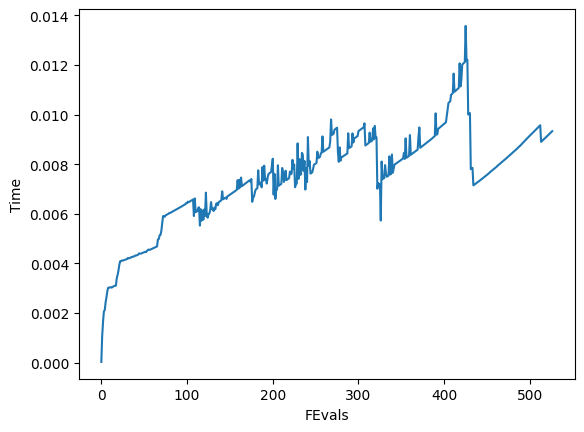

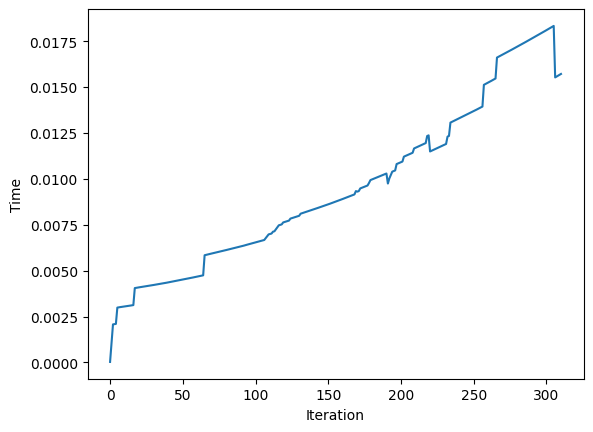

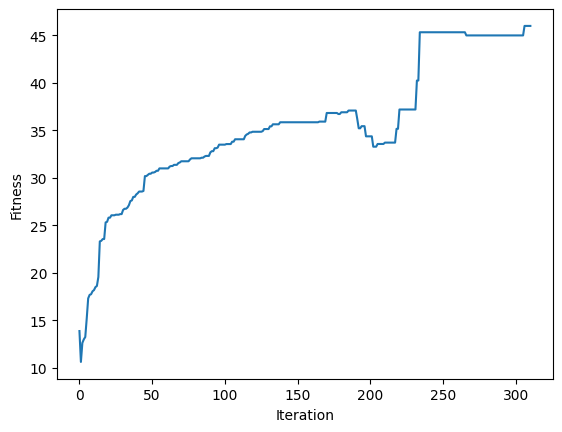

problem_size_evaluated
aggregated_problem_size


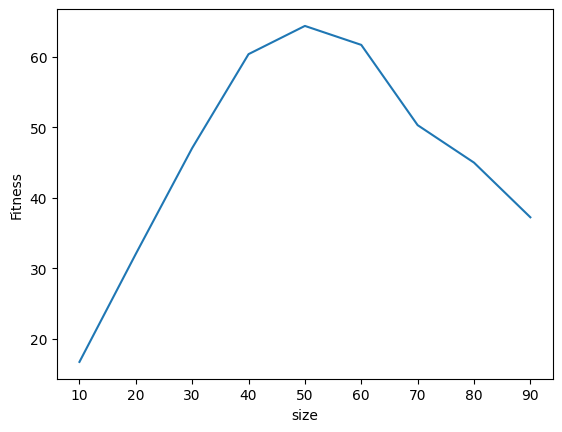

model_evaluated
best_found


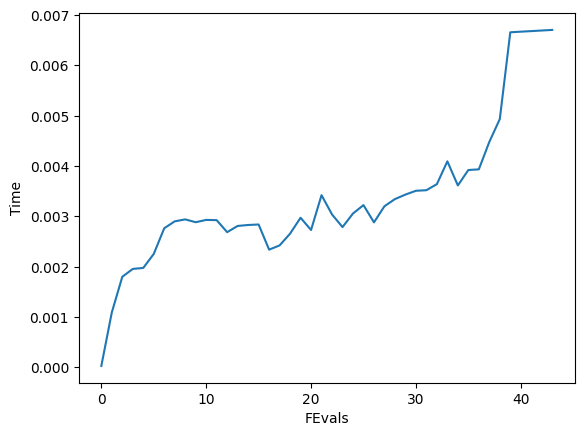

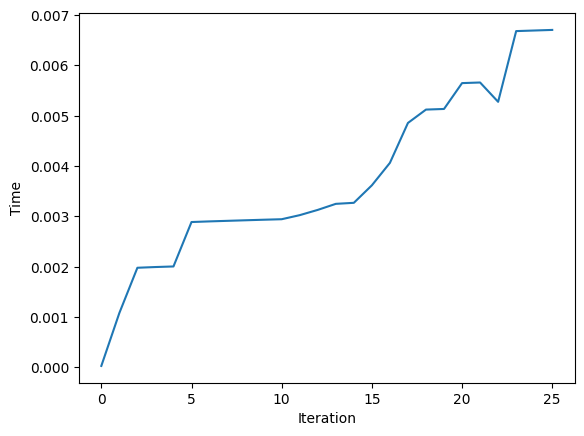

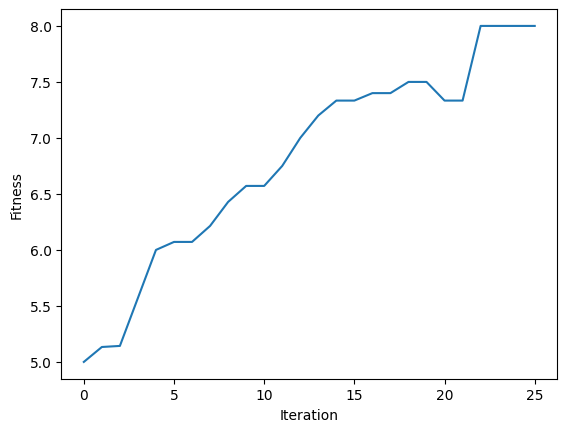

problem_size_evaluated
aggregated_problem_size


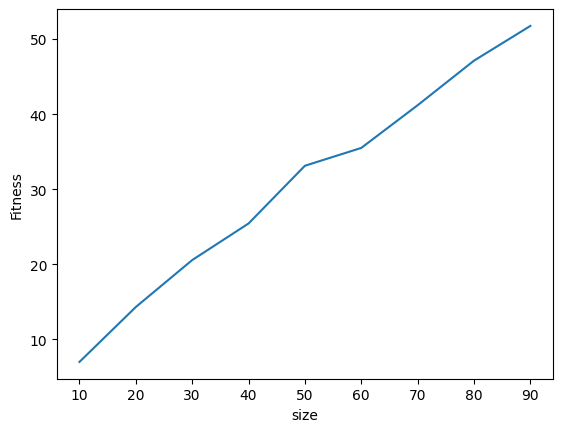

model_evaluated
best_found


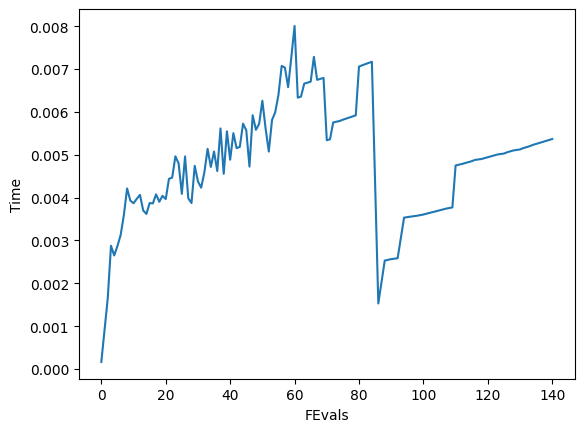

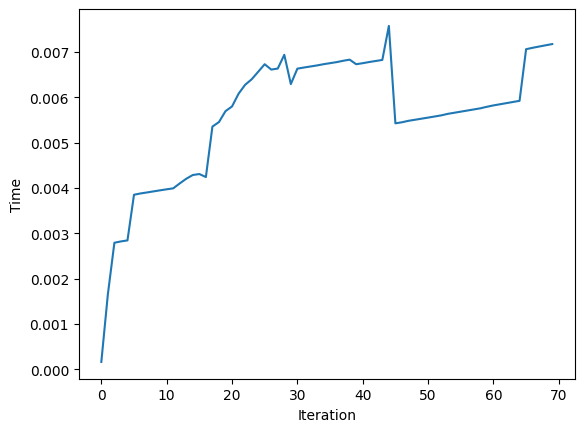

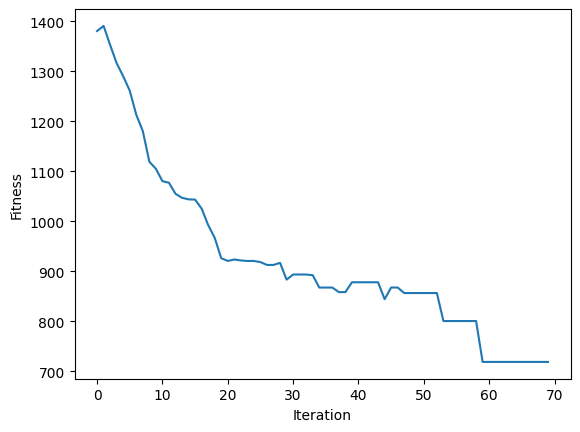

problem_size_evaluated
aggregated_problem_size


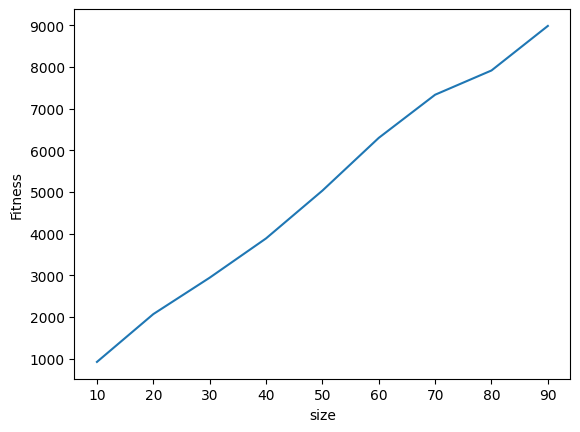

In [12]:


model_responses_rhc = dict({})

for i in [

'ContinuousPeaksGenerator',
'FlipFlopGenerator',
'TSPGenerator'
]:

    model_responses_rhc[i] = dict({})
    

    (
    fevel_time
    ,rhc_best_curve_list
    ,fitness_time
    ,fitness_iter
    ,size_max
    ,rhc_con_size_tab,

    rhc_curve_tab_best,
    rhc_con_size_tab_best ) =  run_ro_analysis_for_fit(fit = i,
                        experiment_name='rhc_test',
                        output_directory=r'runner_out/',
                        ro = 'Random_hill_climb',

                       seeds = seeds,
                       max_attempts = max_attempts,
                           problem_size= list(range(10,100,10))

                           )
    model_responses_rhc[i]['fevel_time'] = fevel_time
    model_responses_rhc[i]['rhc_best_curve_list'] = rhc_best_curve_list
    model_responses_rhc[i]['fitness_time'] = fitness_time
    model_responses_rhc[i]['fitness_iter'] = fitness_time
    model_responses_rhc[i]['size_max'] = size_max
    model_responses_rhc[i]['rhc_con_size_tab'] = rhc_con_size_tab
    model_responses_rhc[i]['rhc_curve_tab_best'] = rhc_curve_tab_best
    model_responses_rhc[i]['rhc_con_size_tab_best']  = rhc_con_size_tab_best 
    


    


In [ ]:
#params = ['Temprature','max_attempts'] 
#"Simulated_annealing"




#model_responses_sa= dict({})

for i in [

#'ContinuousPeaksGenerator',
#'FlipFlopGenerator',
'TSPGenerator'
]:

    model_responses_sa[i] = dict({})
    

    (
    fevel_time
    ,rhc_best_curve_list
    ,fitness_time
    ,fitness_iter
    ,size_max
    ,rhc_con_size_tab,

    rhc_curve_tab_best,
    rhc_con_size_tab_best ) =  run_ro_analysis_for_fit(fit = i,
                        experiment_name='sa_test',
                        output_directory=r'runner_out/',
                        ro = 'Simulated_annealing',

                       seeds = seeds,
                       max_attempts = max_attempts,
                           problem_size= list(range(10,100,10))

                           )
    model_responses_sa[i]['fevel_time'] = fevel_time
    model_responses_sa[i]['rhc_best_curve_list'] = rhc_best_curve_list
    model_responses_sa[i]['fitness_time'] = fitness_time
    model_responses_sa[i]['fitness_iter'] = fitness_time
    model_responses_sa[i]['size_max'] = size_max
    model_responses_sa[i]['rhc_con_size_tab'] = rhc_con_size_tab
    model_responses_sa[i]['rhc_curve_tab_best'] = rhc_curve_tab_best
    model_responses_sa[i]['rhc_con_size_tab_best']  = rhc_con_size_tab_best 
    



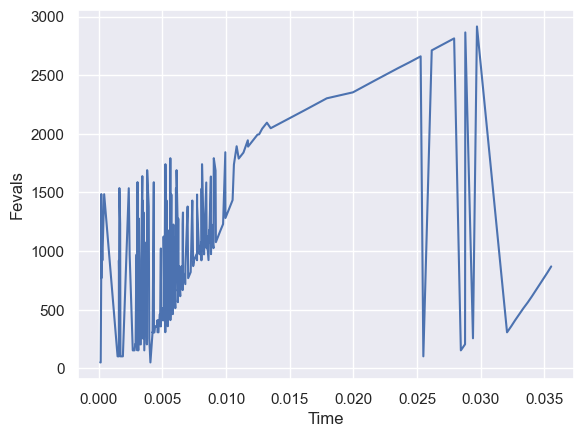

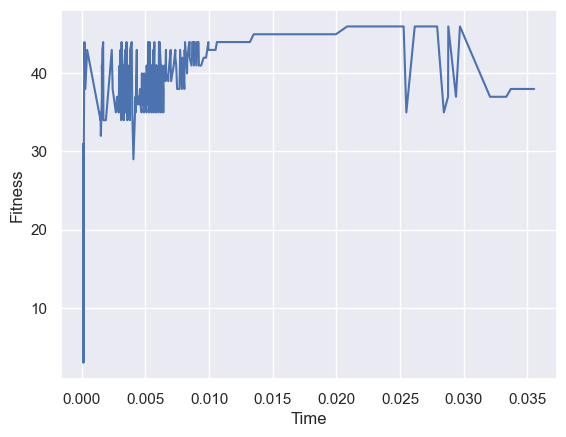

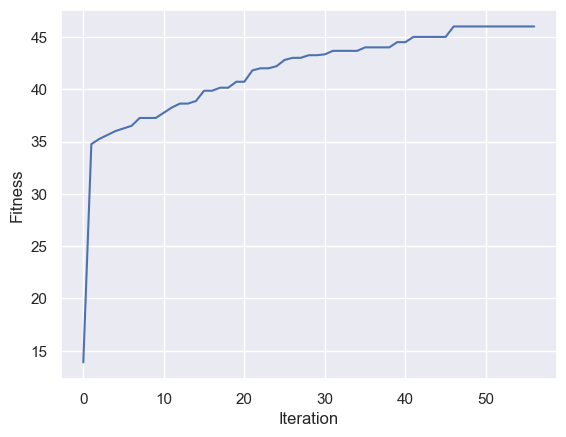

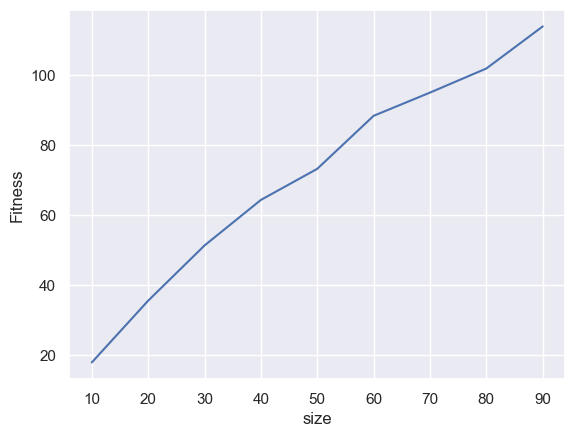

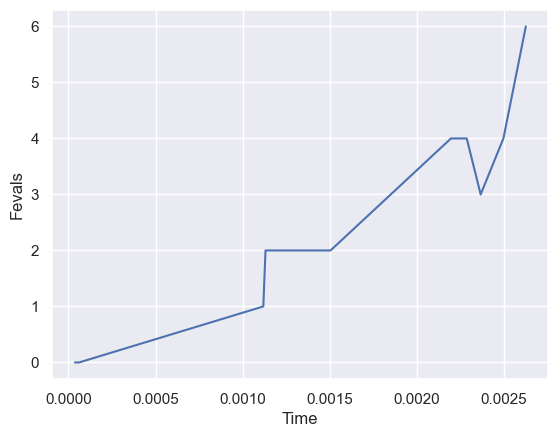

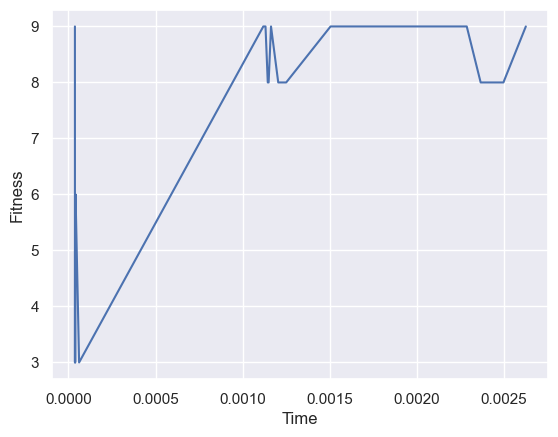

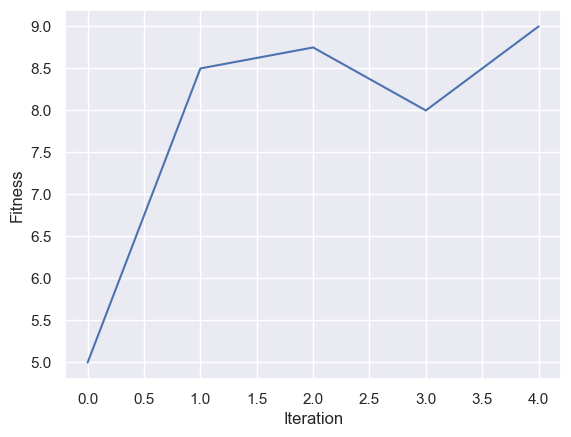

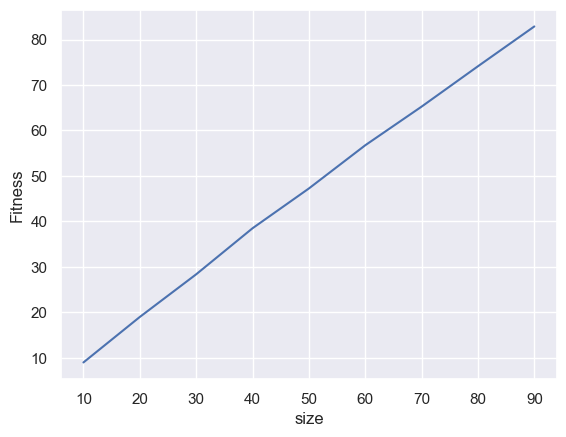

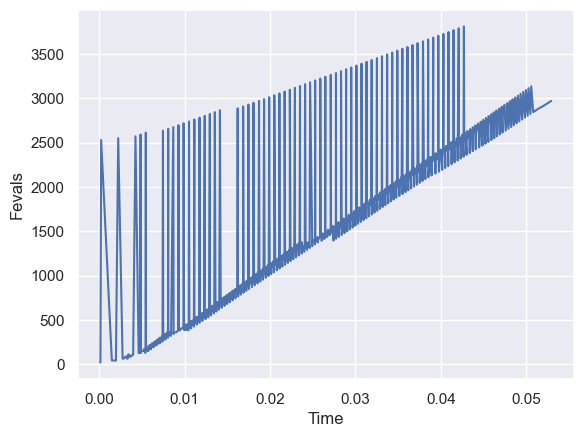

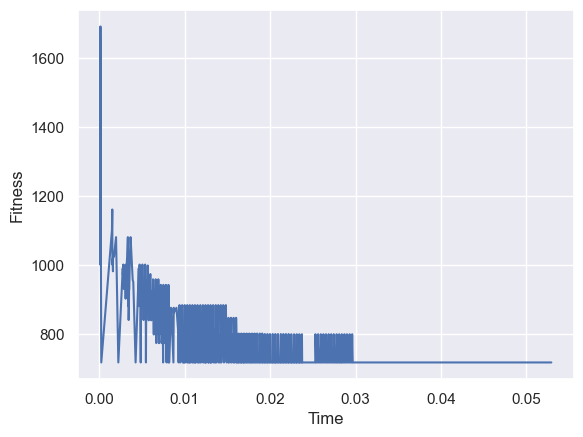

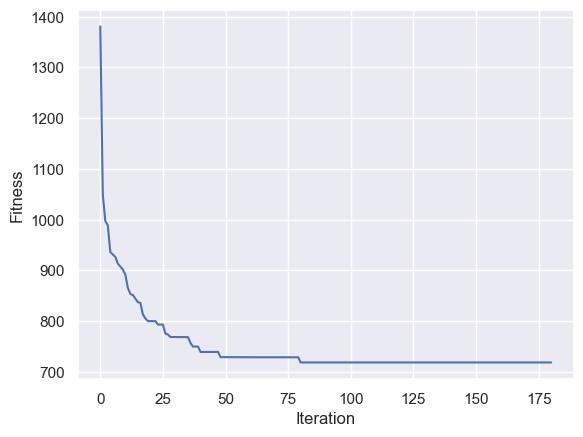

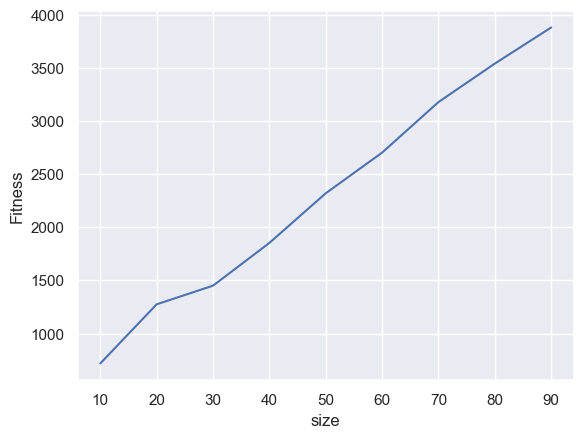

In [351]:
#params = ['Temprature','max_attempts'] 
#"Simulated_annealing"




model_responses_ga= dict({})

for i in [

'ContinuousPeaksGenerator',
'FlipFlopGenerator',
'TSPGenerator'
]:

    model_responses_ga[i] = dict({})
    

    (
    fevel_time
    ,rhc_best_curve_list
    ,fitness_time
    ,fitness_iter
    ,size_max
    ,rhc_con_size_tab,

    rhc_curve_tab_best,
    rhc_con_size_tab_best ) =  run_ro_analysis_for_fit(fit = i,
                        experiment_name='ga_orignal_test',
                        output_directory=r'runner_out/',
                        ro = 'Genetic_Algorithm',

                       seeds = seeds,
                       max_attempts = max_attempts,
                           problem_size= list(range(10,100,10))

                           )
    model_responses_ga[i]['fevel_time'] = fevel_time
    model_responses_ga[i]['rhc_best_curve_list'] = rhc_best_curve_list
    model_responses_ga[i]['fitness_time'] = fitness_time
    model_responses_ga[i]['fitness_iter'] = fitness_time
    model_responses_ga[i]['size_max'] = size_max
    model_responses_ga[i]['rhc_con_size_tab'] = rhc_con_size_tab
    model_responses_ga[i]['rhc_curve_tab_best'] = rhc_curve_tab_best
    model_responses_ga[i]['rhc_con_size_tab_best']  = rhc_con_size_tab_best 
    



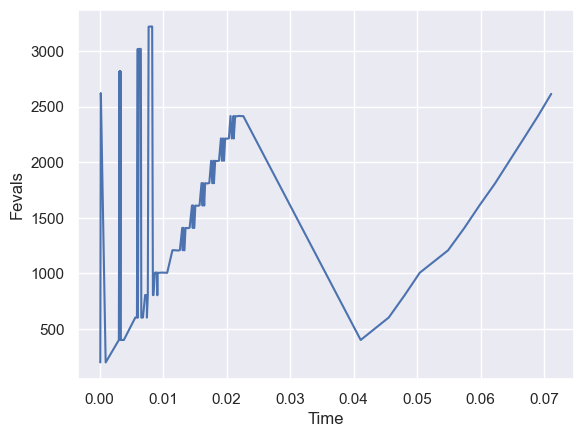

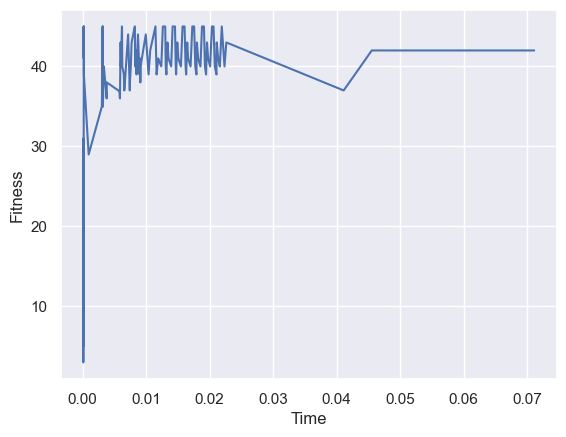

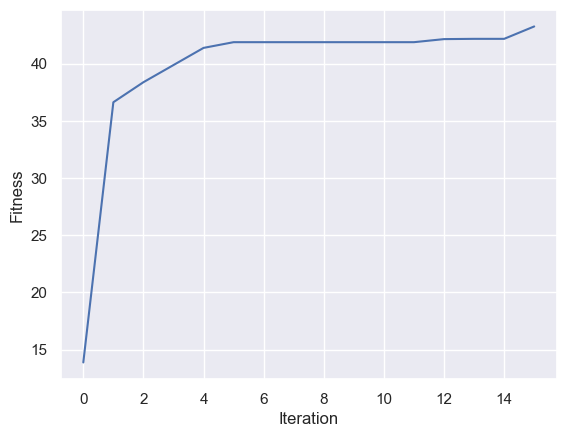

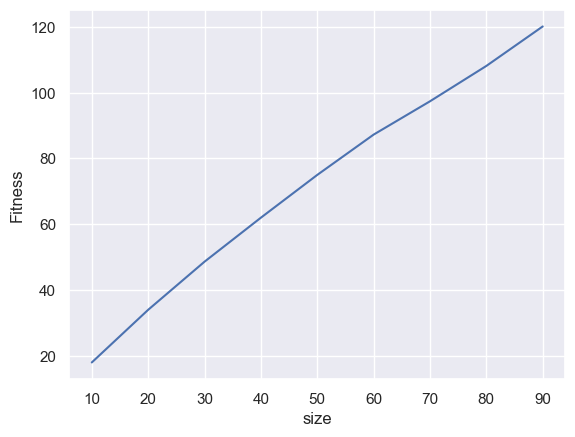

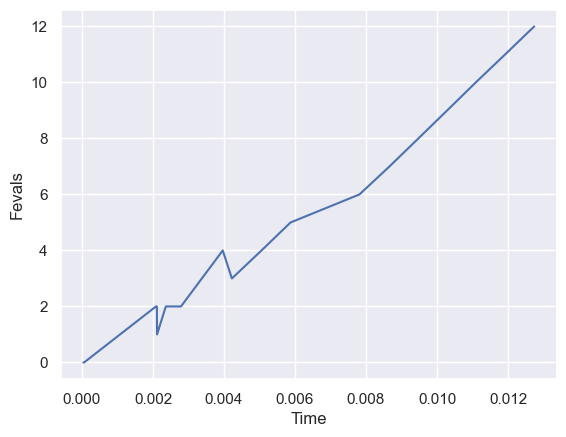

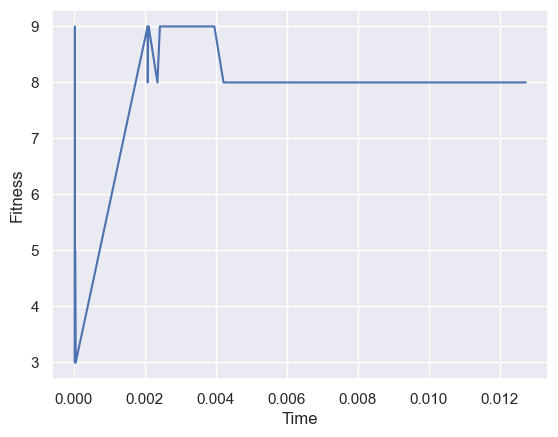

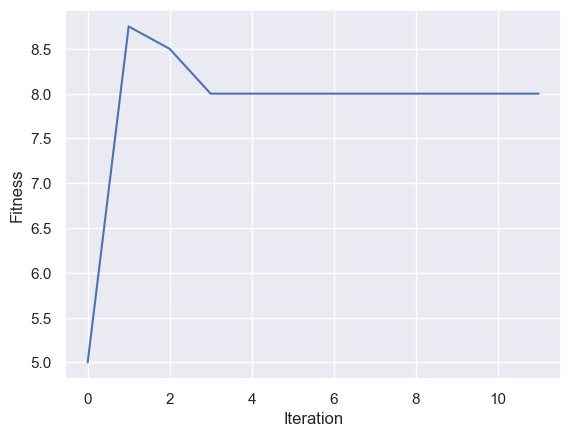

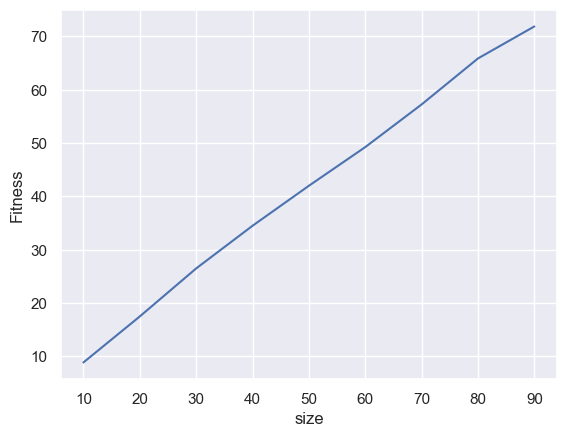

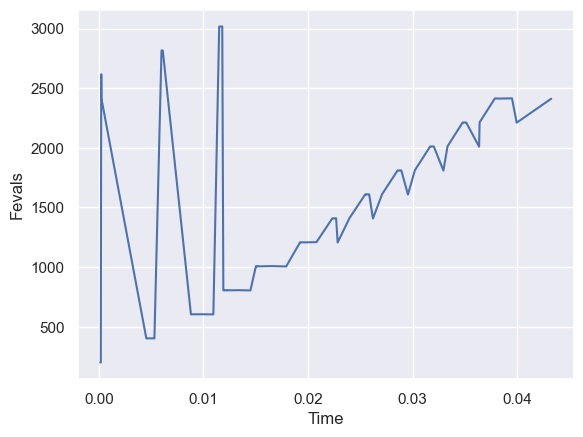

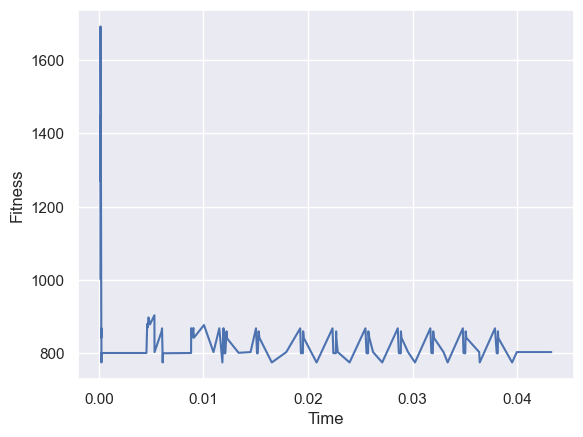

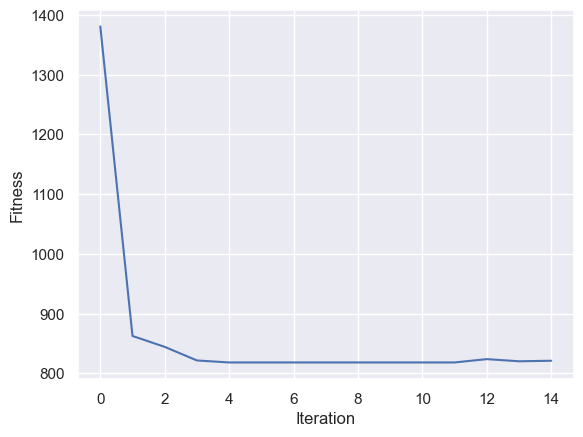

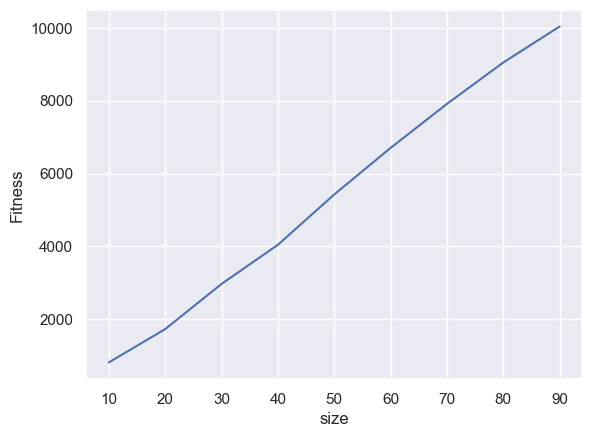

In [350]:
#params = ['Temprature','max_attempts'] 
#"Simulated_annealing"




model_responses_MIMIC= dict({})

for i in [

'ContinuousPeaksGenerator',
'FlipFlopGenerator',
'TSPGenerator'
]:

    model_responses_MIMIC[i] = dict({})
    

    (
    fevel_time
    ,rhc_best_curve_list
    ,fitness_time
    ,fitness_iter
    ,size_max
    ,rhc_con_size_tab,

    rhc_curve_tab_best,
    rhc_con_size_tab_best ) =  run_ro_analysis_for_fit(fit = i,
                        experiment_name='MIMIC_test',
                        output_directory=r'runner_out/',
                        ro = 'MIMIC',

                       seeds = seeds,
                       max_attempts = max_attempts,
                           problem_size= list(range(10,100,10))

                           )
    model_responses_MIMIC[i]['fevel_time'] = fevel_time
    model_responses_MIMIC[i]['rhc_best_curve_list'] = rhc_best_curve_list
    model_responses_MIMIC[i]['fitness_time'] = fitness_time
    model_responses_MIMIC[i]['fitness_iter'] = fitness_time
    model_responses_MIMIC[i]['size_max'] = size_max
    model_responses_MIMIC[i]['rhc_con_size_tab'] = rhc_con_size_tab
    model_responses_MIMIC[i]['rhc_curve_tab_best'] = rhc_curve_tab_best
    model_responses_MIMIC[i]['rhc_con_size_tab_best']  = rhc_con_size_tab_best 
    



In [ ]:
#params = ['Temprature','max_attempts'] 
#"Simulated_annealing"




#model_responses_sa= dict({})

for i in [

#'ContinuousPeaksGenerator',
'FlipFlopGenerator',
#'TSPGenerator'
]:

    model_responses_sa[i] = dict({})
    

    (
    fevel_time
    ,rhc_best_curve_list
    ,fitness_time
    ,fitness_iter
    ,size_max
    ,rhc_con_size_tab,

    rhc_curve_tab_best,
    rhc_con_size_tab_best ) =  run_ro_analysis_for_fit(fit = i,
                        experiment_name='sa_test',
                        output_directory=r'runner_out/',
                        ro = 'Simulated_annealing',

                       seeds = seeds,
                       max_attempts = max_attempts,
                           problem_size= list(range(10,100,10))

                           )
    model_responses_sa[i]['fevel_time'] = fevel_time
    model_responses_sa[i]['rhc_best_curve_list'] = rhc_best_curve_list
    model_responses_sa[i]['fitness_time'] = fitness_time
    model_responses_sa[i]['fitness_iter'] = fitness_time
    model_responses_sa[i]['size_max'] = size_max
    model_responses_sa[i]['rhc_con_size_tab'] = rhc_con_size_tab
    model_responses_sa[i]['rhc_curve_tab_best'] = rhc_curve_tab_best
    model_responses_sa[i]['rhc_con_size_tab_best']  = rhc_con_size_tab_best 
    



In [270]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [282]:
rhc_best_curve_list.groupby('Time').FEvals.mean()

Time
0.000045       0.0
0.000046       0.0
0.000046       0.0
0.000047       0.0
0.000049       0.0
             ...  
0.069814    1461.0
0.069919    1462.0
0.070023    1463.0
0.070127    1464.0
0.070231    1465.0
Name: FEvals, Length: 3857, dtype: float64

<AxesSubplot:xlabel='Time'>

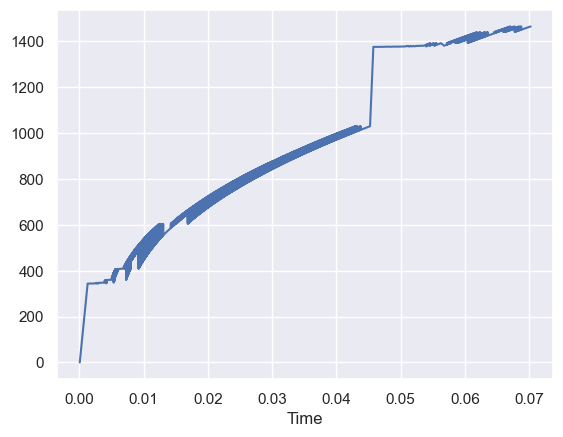

In [277]:



rhc_best_curve_list.groupby('Time').FEvals.mean().plot()

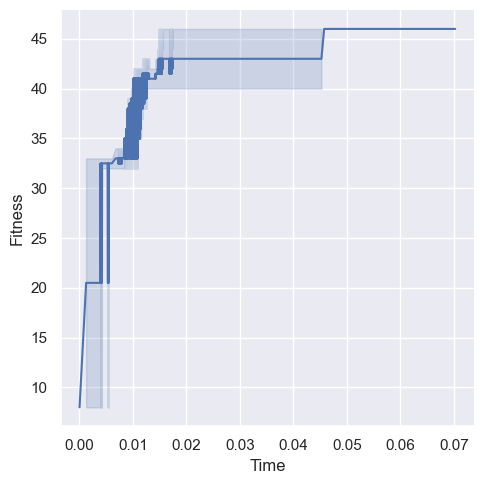

In [286]:
sns.relplot(data=rhc_best_curve_list, x="Time",y="Fitness"
            , kind="line")

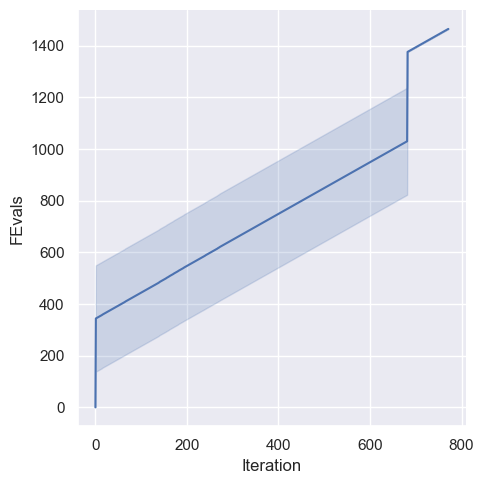

In [280]:
sns.relplot(data=rhc_best_curve_list, x="Iteration", y="FEvals", kind="line")

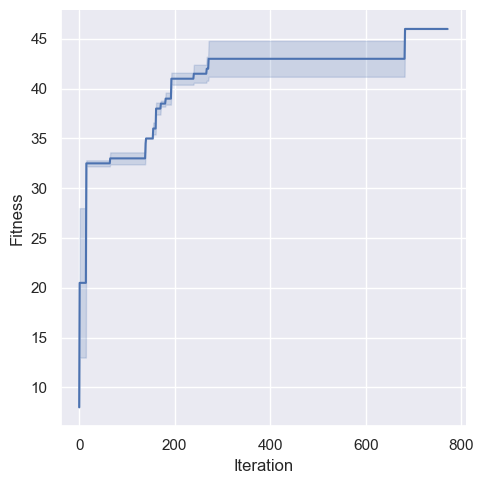

In [274]:
sns.relplot(data=rhc_best_curve_list, x="Iteration", y="Fitness", kind="line")

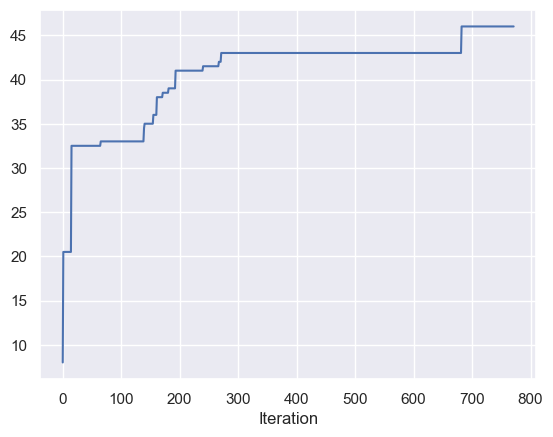

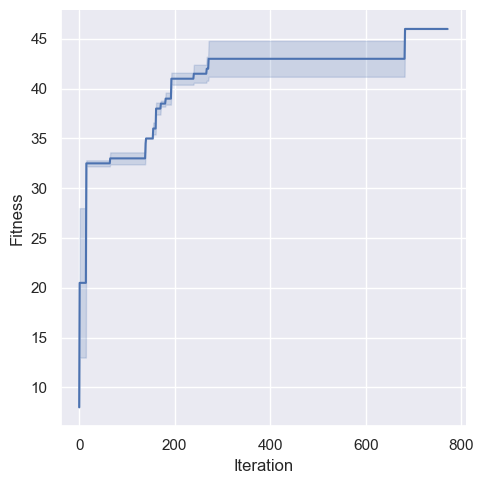

In [271]:
rhc_best_curve_list = rhc_curve_list[rhc_curve_list.Restarts.isin([rhc_curve_tab_best.Restarts]) & 
              rhc_curve_list.max_attempts.isin([rhc_curve_tab_best.max_attempts]) 
              
              
              
              ]


rhc_best_curve_list.groupby('Iteration').Fitness.mean().plot()

sns.relplot(data=rhc_best_curve_list, x="Iteration", y="Fitness", kind="line")


In [ ]:
rhc_best_curve_list.groupby('Iteration').Fitness.mean().plot()


In [263]:
rhc_con_size = evaluate_problem_size(fit = 'ContinuousPeaksGenerator',
                    experiment_name='rhc_test_',
                    output_directory=r'runner_out/problem_size/',
                    ro = 'Random_hill_climb',
                   
                   seeds = seeds,
                   problem_size = list(range(10,100,10)),
                   best_ro_params ={'max_attempts':rhc_curve_tab_best['max_attempts'] ,
                                    'restart_list':[int(rhc_curve_tab_best['Restarts'])]})



rhc_con_size_tab,rhc_con_size_list,rhc_con_size_tab_best = agg_problem_size_model(rhc_con_size,
                                                                 exp_name='rhc_test',
                                                                 output_directory='_',
                                                                 fitness_='continous_peak'
                                                                                 
                                                                                 
                                                                                 )

In [265]:
rhc_con_size_tab

Fitness     FEvals      Time  \
Restarts Iteration max_iters size                                 
1        0         1024      10     8.8125   257.8125  0.016838   
                             20    17.1250   283.3750  0.016982   
                             30    12.3750   368.0625  0.025500   
                             40     7.9375   402.3750  0.029637   
                             50     8.8750   476.4375  0.038975   
...                                    ...        ...       ...   
         1024      1024      50    75.4375  1420.3125  0.186515   
                             60    77.8125  1501.0000  0.189110   
                             70    74.3125  1559.7500  0.204919   
                             80    77.8125  1566.6875  0.206615   
                             90    56.5000  1563.7500  0.207259   

                                   current_restart      seed  
Restarts Iteration max_iters size                             
1        0         1024      10                0.5  5711.625  
                             20                0.5  5711.625  
                             30                0.5  5711.625  
                             40                0.5  5711.625  
                             50                0.5  5711.625  
...                                            ...       ...  
         1024      1024      50                0.5  5711.625  
                             60                0.5  5711.625  
                             70                0.5  5711.625  
                             80                0.5  5711.625  
                             90                0.5  5711.625  

[63 rows x 5 columns]

size
10    16.4375
20    32.7500
30    48.5625
40    61.3750
50    75.4375
60    77.8125
70    74.3125
80    77.8125
90    56.5000
Name: Fitness, dtype: float64

<AxesSubplot:xlabel='Iteration'>

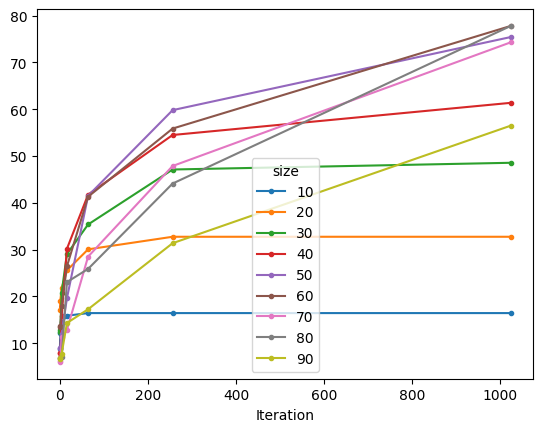

In [268]:
rhc_con_size_tab.reset_index().pivot(

values='Fitness', index=['Iteration'], columns='size'
).plot(marker = '.')

In [124]:
curve_tab = curve_list_agg#rhc_dict[2]['curve']


#FEvals min per restart with max fitness

#how do i define best.

#the only parameters im using is max attempts and restarts
# the best model will be the simplest and most fit model on average ( i.e) over the random seeds
# do to get that though



#so inserity
#the number of Fevals are less

curve_tab[curve_tab.Fitness == curve_tab.Fitness.max()].reset_index().sort_values('FEvals'
                                                                   )#.groupby('Restarts').apply(
                                                #lambda x: x.iloc[]
                                                 #                                                      
                                                 #               )

,Restarts,Iteration,max_iters,Time,Fitness,FEvals,current_restart
0,1,682,1024,0.046770,46.0,1376.0,1.0
1,1,683,1024,0.049429,46.0,1377.0,1.0
2,1,684,1024,0.052002,46.0,1378.0,1.0
3,1,685,1024,0.052103,46.0,1379.0,1.0
4,1,686,1024,0.052202,46.0,1380.0,1.0
...,...,...,...,...,...,...,...
180,100,924,1024,0.085873,46.0,43407.0,67.0
181,100,925,1024,0.085998,46.0,43408.0,67.0
182,100,926,1024,0.086120,46.0,43409.0,67.0
183,100,927,1024,0.086243,46.0,43410.0,67.0


In [94]:
rhc_run_curves[rhc_run_curves.Fitness == rhc_run_stats.Fitness.max()].sort_values('FEvals')


,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
952,271,0.014063,46.0,965.0,1,1024,1
9437,271,0.014063,46.0,965.0,100,1024,1
2405,271,0.014063,46.0,965.0,10,1024,1
2406,272,0.014107,46.0,966.0,10,1024,1
9438,272,0.014107,46.0,966.0,100,1024,1
...,...,...,...,...,...,...,...
71534,641,0.038717,46.0,63792.0,100,1024,99
71535,642,0.038806,46.0,63793.0,100,1024,99
71536,643,0.038895,46.0,63794.0,100,1024,99
71537,644,0.038984,46.0,63795.0,100,1024,99


In [41]:
best_fit_rhc_curve = rhc_run_curves[rhc_run_curves.Fitness == rhc_run_stats.Fitness.min()]

best_fit_min_feval_rhc_curve = best_fit_rhc_curve[best_fit_rhc_curve.FEvals == best_fit_rhc_curve.FEvals.min()]

best_fit_min_feval_rhc_curve

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
5053,197,0.036664,46.0,2587.0,100,1024,12


In [34]:
rhc_run_stats
best_selected = rhc_run_stats[rhc_run_stats.Fitness == rhc_run_stats.Fitness.max()].sort_values('FEvals')#.reset_index(drop=True).iloc[0]
best_selected

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
180,256,46.0,2646,1.252131,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,12
181,1024,46.0,2687,1.279416,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,12
278,256,46.0,5271,3.900137,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,26
279,1024,46.0,5271,3.900137,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,26
313,256,46.0,6217,5.178146,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,31
314,1024,46.0,6218,5.201141,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,31
341,256,46.0,6946,6.300651,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,35
342,1024,46.0,6960,6.336562,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,35
348,256,46.0,7152,6.636665,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",100,1024,36
349,1024,46.0,7152,6.636665,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",100,1024,36


In [31]:
rhc_run_stats[rhc_run_stats.Fitness == rhc_run_stats.Fitness.max()].sort_values('Iteration')

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
697,64,46.0,18088,34.360735,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",100,1024,86
180,256,46.0,2646,1.252131,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,12
726,256,46.0,19068,37.801430,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,90
705,256,46.0,18439,35.467723,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",100,1024,87
698,256,46.0,18175,34.598020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",100,1024,86
684,256,46.0,17835,33.298933,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,84
628,256,46.0,15907,27.161434,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,76
621,256,46.0,15638,26.417410,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",100,1024,75
593,256,46.0,14845,23.990241,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,71
558,256,46.0,13517,20.339345,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100,1024,66


In [33]:
rhc_run_curves.shape

(22890, 7)

In [44]:
best_rhc_curve_df['current_restart']

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
2553,0,0.000234,5.0,0.0,100,1024,0
2554,1,0.024942,6.0,2.0,100,1024,0
2555,2,0.026780,6.0,3.0,100,1024,0
2556,3,0.026802,6.0,4.0,100,1024,0
2557,4,0.026819,6.0,5.0,100,1024,0
...,...,...,...,...,...,...,...
22885,221,0.037751,40.0,21027.0,100,1024,100
22886,222,0.037806,40.0,21028.0,100,1024,100
22887,223,0.037852,40.0,21029.0,100,1024,100
22888,224,0.037897,40.0,21030.0,100,1024,100


In [49]:
best_fit_min_feval_rhc_curve.Restarts.values[0]

100

In [54]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000234,5.0,0.0,1,1024,0
1,1,0.024942,6.0,2.0,1,1024,0
2,2,0.026780,6.0,3.0,1,1024,0
3,3,0.026802,6.0,4.0,1,1024,0
4,4,0.026819,6.0,5.0,1,1024,0
...,...,...,...,...,...,...,...
22885,221,0.037751,40.0,21027.0,100,1024,100
22886,222,0.037806,40.0,21028.0,100,1024,100
22887,223,0.037852,40.0,21029.0,100,1024,100
22888,224,0.037897,40.0,21030.0,100,1024,100


In [62]:
best_rhc_curve_df.reset_index(drop=True).groupby('Iteration').mean()

,Time,Fitness,FEvals,Restarts,max_iters,current_restart
Iteration,,,,,,
0,0.000234,5.000000,0.000000,100.0,1024.0,0.0
1,0.024942,12.643564,10222.564356,100.0,1024.0,50.0
2,0.026780,14.831683,10223.722772,100.0,1024.0,50.0
3,0.026802,15.940594,10224.841584,100.0,1024.0,50.0
4,0.026819,18.138614,10226.039604,100.0,1024.0,50.0
...,...,...,...,...,...,...
304,0.058435,45.000000,8696.000000,100.0,1024.0,40.5
305,0.058501,45.000000,8697.000000,100.0,1024.0,40.5
306,0.058564,45.000000,8698.000000,100.0,1024.0,40.5


<AxesSubplot:title={'center':'RHC_fitness_vs'}, xlabel='FEvals', ylabel='Fitness'>

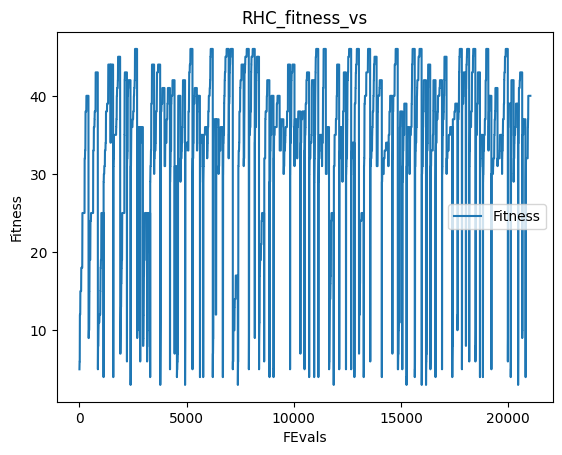

In [63]:
best_rhc_curve_df.set_index('FEvals').plot(y = 'Fitness',ylabel='Fitness',
                                                                        title='RHC_fitness_vs'
                                                                        )

<AxesSubplot:xlabel='Iteration', ylabel='Fitness'>

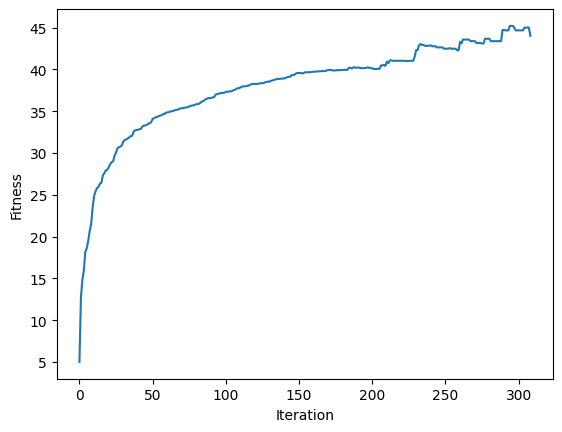

In [60]:
best_rhc_curve_df = rhc_run_curves[(
    rhc_run_curves.Restarts == best_fit_min_feval_rhc_curve.Restarts.values[0])
    #&
    #(
    # rhc_run_curves.current_restart == best_fit_min_feval_rhc_curve.current_restart.values[0])
]



#so avg on Iterations

best_rhc_curve_df.reset_index().groupby('Iteration').Fitness.mean().plot(y = 'Fitness',ylabel='Fitness',
                                                                        title='RHC_fitness_vs'
                                                                        )





#.sort_values('Time')

In [ ]:
experiment_name = 'example_experiment'
    problem = TSPGenerator.generate(seed=SEED, number_of_cities=22)



In [4]:
import numpy as np
from mlrose import mlrose

fitness = mlrose.FourPeaks(t_pct=0.1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name="RCH_final",
                       output_directory="runner_out",
                       seed=None,
                       iteration_list=2 ** np.arange(12),
                       max_attempts=1000,
                       restart_list=[100])
rhc_run_stats, rhc_run_curves = rhc.run()


sa = mlrose.SARunner(problem=problem,
                     experiment_name="SA_final",
                     output_directory="runner_out",
                     seed=None,
                     iteration_list=2 ** np.arange(13),
                     max_attempts=1000,
                     temperature_list=[250],
                     decay_list=[mlrose.ExpDecay])
sa_run_stats, sa_run_curves = sa.run()


ga = mlrose.GARunner(problem=problem,
                     experiment_name="GA_final",
                     output_directory="runner_out",
                     seed=None,
                     iteration_list=2 ** np.arange(13),
                     max_attempts=1000,
                     population_sizes=[200],
                     mutation_rates=[0.3])
ga_run_stats, ga_run_curves = ga.run()


mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           output_directory="runner_out",
                           seed=None,
                           iteration_list=2 ** np.arange(13),
                           population_sizes=[200],
                           max_attempts=500,
                           keep_percent_list=[0.2],
                           use_fast_mimic=True)
mimic_run_stats, mimic_run_curves = mimic.run()

Init signature:
mlrose_hiive.RHCRunner(
    problem,
    experiment_name,
    seed,
    iteration_list,
    restart_list,
    max_attempts=500,
    generate_curves=True,
    **kwargs,
)
Docstring:     
Helper class that provides a standard way to create an ABC using
inheritance.
Source:        
@short_name('rhc')
class RHCRunner(_RunnerBase):

    def __init__(self, problem, experiment_name, seed, iteration_list, restart_list,
                 max_attempts=500, generate_curves=True, **kwargs):
        super().__init__(problem=problem, experiment_name=experiment_name, seed=seed, iteration_list=iteration_list,
                         max_attempts=max_attempts, generate_curves=generate_curves,
                         **kwargs)
        self.restart_list = restart_list

    def run(self):
        return super().run_experiment_(algorithm=mlrose_hiive.random_hill_climb,
                                       restarts=('Restarts', self.restart_list))
File:           ~/anaconda3/envs/experime

In [ ]:
# Define Fitness function and discrete problem object
fitness = mlrose_hiive.ContinuousPeaks

problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

max_attempts = 100
max_iters = 100

# RHC
print("Running Random Hill Climb Experiment")
start_time = time.time()
rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                                                     max_attempts = max_attempts, 
                                                                                     max_iters=max_iters, 
                                                                                     curve=True, 
                                                                                     random_state=42,
                                                                                    restarts=100)
end_time = time.time()
rhc_time = end_time - start_time
print("Time (s): {}".format(rhc_time))
print()

# SA
print("Running Simulated Annealing Experiment")
start_time = time.time()
sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=0.1, min_temp=1))
end_time = time.time()
sa_time = end_time - start_time
print("Time (s): {}".format(sa_time))
print()

# GA
print("Running Genetic Algorithm Experiment")
start_time = time.time()
ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    pop_size=200,
                                                    mutation_prob=0.2)
end_time = time.time()
ga_time = end_time - start_time
print("Time (s): {}".format(ga_time))
print()

# MIMIC
print("Running MIMIC Algorithm Experiment")
start_time = time.time()
mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                            problem, 
                                                            max_attempts = 100, 
                                                            max_iters = 100,  
                                                            curve = True, 
                                                            random_state = 42,
                                                            keep_pct=0.25)
end_time = time.time()
mimic_time = end_time - start_time
print("Time (s): {}".format(mimic_time))
print()

# Plot Iterations vs Fitness
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_fitness_curve, label='RHC', color='green')
plt.plot(iterations, sa_fitness_curve, label='SA', color='red')
plt.plot(iterations, ga_fitness_curve, label='GA', color='blue')
plt.plot(iterations, mimic_fitness_curve, label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.savefig("results/fourpeaks_fitness.png")

# Plot Time Table
# https://www.geeksforgeeks.org/creating-a-pandas-dataframe-using-list-of-tuples/
data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
dfi.export(df,"results/fourpeaks_times.png")



In [ ]:
grid_search_parameters = ({
        'max_iters': [1, 2, 4, 8, 16, 32, 64, 128],                     # nn params
        'learning_rate': [0.001, 0.002, 0.003],                         # nn params
        "activation": [mlrose_hiive.neural.activation.relu],
        'schedule': [mlrose_hiive.ArithDecay(1), mlrose_hiive.ArithDecay(100), mlrose_hiive.ArithDecay(1000)]  # sa params
        
    })

nnr = mlrose_hiive.NNGSRunner(x_train=X_train,
                     y_train=y_train,
                     x_test=X_test,
                     y_test=y_test,
                     experiment_name='nn_test',
                     algorithm=mlrose_hiive.algorithms.sa.simulated_annealing,
                     grid_search_parameters=grid_search_parameters,
                     iteration_list=[10, 50, 100],
                     seed=42
                     )

# The runner returns a 4-tuple
iteration_list_stats, curve, comparison, grid_search_cv_result = nnr.run()